In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression 
import scipy,scipy.stats
#import statsmodels.formula.api as sm
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as sm
from sklearn import metrics

In [2]:
data=pd.read_csv('loans.csv')
data.head()

,credit.policy,purpose,int.rate,installment,annual_inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,85000.00038,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,65000.00007,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,31999.99994,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,85000.00038,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,80799.99964,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [3]:
data.isnull().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
annual_inc            4
dti                   0
fico                  0
days.with.cr.line    29
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not_fully_paid        0
dtype: int64

In [4]:
data['days.with.cr.line']=data['days.with.cr.line'].fillna(np.median(data['days.with.cr.line'].dropna()))
data['annual_inc']=data['annual_inc'].fillna(np.median(data['annual_inc'].dropna()))
data['revol.util']=data['revol.util'].fillna(np.median(data['revol.util'].dropna()))
data['inq.last.6mths']=data['inq.last.6mths'].fillna(np.median(data['inq.last.6mths'].dropna()))
data['delinq.2yrs']=data['delinq.2yrs'].fillna(np.median(data['delinq.2yrs'].dropna()))
data['pub.rec']=data['pub.rec'].fillna(np.median(data['pub.rec'].dropna()))



In [5]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
annual_inc           0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not_fully_paid       0
dtype: int64

In [6]:
df=pd.get_dummies(data,drop_first=True)
df.head()


,credit.policy,int.rate,installment,annual_inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,85000.00038,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,1,0,0,0,0
1,1,0.1071,228.22,65000.00007,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,1,0,0,0,0,0
2,1,0.1357,366.86,31999.99994,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0,0,1,0,0,0,0
3,1,0.1008,162.34,85000.00038,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0,0,1,0,0,0,0
4,1,0.1426,102.92,80799.99964,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0,1,0,0,0,0,0


In [7]:
x=df.drop(['not_fully_paid','days.with.cr.line','int.rate','dti'],axis=1)
y=df['not_fully_paid']
#print(x.columns)

In [8]:
lor=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
lor.fit(x_train,y_train)
#predict the train data
pred_train=lor.predict(x_train)#predict has inbuild thershold
pd.crosstab(y_train,pred_train)
#print(len(pred_train))


col_0,0,1
not_fully_paid,,
0,5647,1
1,1055,1


In [9]:
pred_train_proba=lor.predict_proba(x_train)
pred_test_proba=lor.predict_proba(x_test)


In [10]:
pred_train2only1=pred_train_proba[:,1]

In [11]:
x1=[]
for i in pred_train2only1:
    if(i>0.3):
        x1.append(1)
    else:
        x1.append(0)


In [12]:
pd.crosstab(y_train,np.array(x1))

col_0,0,1
not_fully_paid,,
0,5638,10
1,1049,7


In [13]:
accuracy=(5647+1)/x_train.shape[0]
print(accuracy)

0.8424821002386634


In [14]:
sensiv=1/(1055+1)
print(sensiv)

0.000946969696969697


In [15]:
precision=1/(1+1)
print(precision)

0.5


In [16]:
specif=5647/(5647+1)
print(specif)

0.9998229461756374


In [17]:
#predict the test data
pred_test=lor.predict(x_test)
pd.crosstab(y_test,pred_test)

col_0,0
not_fully_paid,
0,2397
1,477


In [18]:
specif=2397/(2397+477)
print(specif)

0.8340292275574113


In [19]:
#x=df.drop(['not_fully_paid','days.with.cr.line'],axis=1)
#y=df['not_fully_paid']
x2=add_constant(x_train)

logit=sm.Logit(y_train,x2)
result=logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.407752
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         not_fully_paid   No. Observations:                 6704
Model:                          Logit   Df Residuals:                     6688
Method:                           MLE   Df Model:                           15
Date:                Wed, 16 Jan 2019   Pseudo R-squ.:                 0.06378
Time:                        11:16:00   Log-Likelihood:                -2733.6
converged:                       True   LL-Null:                       -2919.8
                                        LLR p-value:                 4.173e-70
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          5.5464      0.936      5.929      0.000      

In [20]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [21]:
vif

,VIF Factor,features
0,8.145388,credit.policy
1,4.187260,installment
2,2.815090,annual_inc
3,16.876706,fico
4,1.616855,revol.bal
5,3.823945,revol.util
6,2.123527,inq.last.6mths
7,1.089993,delinq.2yrs
8,1.071842,pub.rec
9,1.594746,purpose_credit_card


C:\Users\HEMNATH\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-0.05, 1.05)

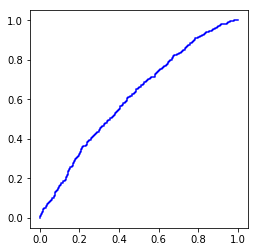

In [22]:
fpr,tpr,thershold=metrics.roc_curve(y_test,pred_test_proba[:,1])
plt.plot(fpr,tpr,label='ROC curve',color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

(-0.05, 1.05)

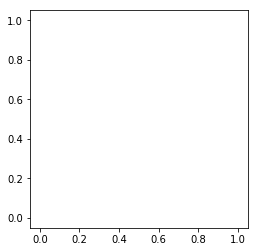

In [23]:
#fpr,tpr,thershold=metrics.roc_curve(y_train,pred_train_proba[:,1])
#plt.plot(fpr,tpr,label='ROC curve',color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

In [24]:
AUC=metrics.auc(fpr,tpr)
print(AUC)

0.6105596705875356
